In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/research_projects/dreambooth_inpaint/train_dreambooth_inpaint.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/research_projects/dreambooth_inpaint/train_dreambooth_inpaint_lora.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
# %pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors

In [ ]:
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/research_projects/dreambooth_inpaint/train_dreambooth_inpaint.py

In [ ]:
#@markdown If model weights should be saved directly in google drive (takes around 4-5 GB).
save_to_gdrive = True #@param {type:"boolean"}
if save_to_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')

#@markdown Name/Path of the initial model.
MODEL_NAME = "runwayml/stable-diffusion-inpainting" #@param {type:"string"}

#@markdown Enter the directory name to save model at.

OUTPUT_DIR = "DreamboothInpaint/weights" #@param {type:"string"}
if save_to_gdrive:
    OUTPUT_DIR = "/content/drive/MyDrive/" + OUTPUT_DIR
else:
    OUTPUT_DIR = "/content/" + OUTPUT_DIR

print(f"[*] Weights will be saved at {OUTPUT_DIR}")

!mkdir -p $OUTPUT_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[*] Weights will be saved at /content/drive/MyDrive/DreamboothInpaint/weights


In [ ]:
# # You can also add multiple concepts here. Try tweaking `--max_train_steps` accordingly.

# concepts_list = [
#     {
#         "instance_prompt":      "photo of nnn shirt",
#         "class_prompt":         "photo of a shirt",
#         "instance_image_path":    "/content/drive/MyDrive/Dreambooth/dataset_shirts/New folder (2)/fff",
#         "class_images_path":       "/content/drive/MyDrive/Dreambooth/dataset_shirts/New folder (2)"
#     }
#     # {
#     #     "instance_prompt":      "photo of fff shirt",
#     #     "class_prompt":         "photo of a shirt",
#     #     "instance_data_dir":    "/content/data/fff",
#     #     "class_data_dir":       "/content/data/shirt2"
#     # }
# ]

# # `class_data_dir` contains regularization images
# import json
# import os
# for c in concepts_list:
#     os.makedirs(c["instance_image_path"], exist_ok=True)

# with open("concepts_list.json", "w") as f:
#     json.dump(concepts_list, f, indent=4)

In [ ]:
!pip install -qq -U diffusers==0.11.1 transformers ftfy gradio accelerate

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git

In [ ]:
# !python3 train_dreambooth_inpaint.py \
#   --pretrained_model_name_or_path="runwayml/stable-diffusion-inpainting" \
#   --instance_data_dir="/content/drive/MyDrive/Dreambooth/dataset_shirts/New folder (2)/fff" \
#   --output_dir="/content/drive/MyDrive/DreamboothInpaint/weights" \
#   --seed=30 \
#   --instance_prompt="a red checkered shirt" \
#   --resolution=512 \
#   --train_batch_size=1 \
#   --mixed_precision="fp16" \
#   --use_8bit_adam \
#   --gradient_accumulation_steps=1 \
#   --gradient_checkpointing \
#   --learning_rate=1e-6 \
#   --train_text_encoder \
#   --lr_scheduler="constant" \
#   --lr_warmup_steps=0 \
#   --max_train_steps=800

In [ ]:
! pip install diffusers==0.14.0 xformers transformers scipy ftfy accelerate controlnet_aux

In [ ]:
!pip install torch

In [ ]:
import torch

In [ ]:
! git clone https://github.com/mikonvergence/ControlNetInpaint
import sys
sys.path.append('./ControlNetInpaint/')

Cloning into 'ControlNetInpaint'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 79 (delta 29), reused 51 (delta 13), pack-reused 0
Unpacking objects: 100% (79/79), 15.05 MiB | 11.63 MiB/s, done.


In [ ]:
from diffusers import StableDiffusionInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from src.pipeline_stable_diffusion_controlnet_inpaint import *
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     "/content/drive/MyDrive/DreamboothInpaint/weights", controlnet=controlnet, torch_dtype=torch.float16,low_cpu_mem_usage=False,
    device_map=None
 )
from diffusers.models.autoencoder_kl import AutoencoderKL

# model = AutoencoderKL.from_pretrained(
#     "/content/drive/MyDrive/Images/Random_images/Weights/vae",
#     low_cpu_mem_usage=False,
#     device_map=None
# )


pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
pipe.enable_xformers_memory_efficient_attention()

The config attributes {'rescale_betas_zero_snr': False, 'timestep_spacing': 'leading'} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
The config attributes {'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'class_embeddings_concat': False, 'cross_attention_norm': None, 'encoder_hid_dim': None, 'encoder_hid_dim_type': None, 'mid_block_only_cross_attention': None, 'resnet_out_scale_factor': 1.0, 'resnet_skip_time_act': False, 'time_embedding_act_fn': None, 'time_embedding_dim': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint at /content/drive/MyDrive/DreamboothInpaint/weights/vae were not used when initializing AutoencoderKL: ['encoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_q.bias', 'en

In [ ]:
from controlnet_aux import OpenposeDetector
import torch
from PIL import Image
# from diffusers import StableDiffusionInpaintPipeline,DDIMScheduler

pose_real_image = Image.open("input.jpeg")

openpose = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')

pose_image = openpose(pose_real_image)
pose_real_image=pose_real_image.resize(pose_image.size)

pose_mask=np.zeros_like(np.array(pose_image))
pose_mask[250:700,:,:]=255
pose_mask=Image.fromarray(pose_mask)

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

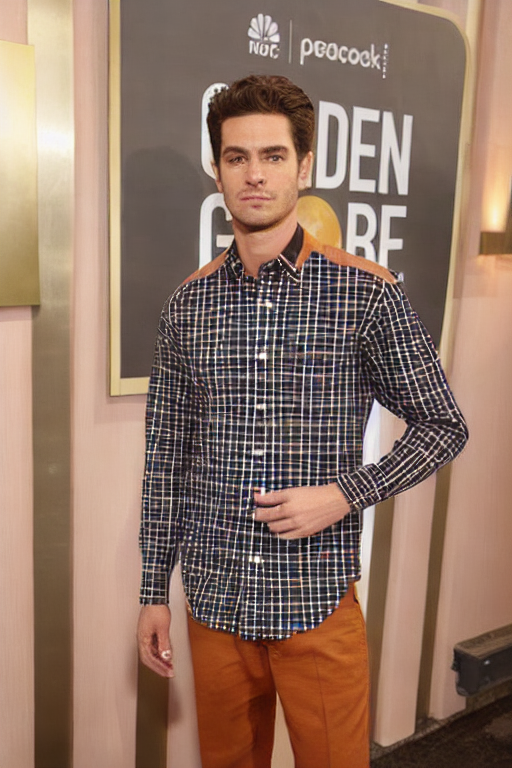

In [ ]:
pipe.to('cuda')

# generate image
generator = torch.manual_seed(0)
new_image = pipe(
    "checkered shirt",
    num_inference_steps=20,
    generator=generator,
    image=pose_real_image,
    control_image=pose_image,
    mask_image=pose_mask
).images[0]

new_image

(-0.5, 511.5, 767.5, -0.5)

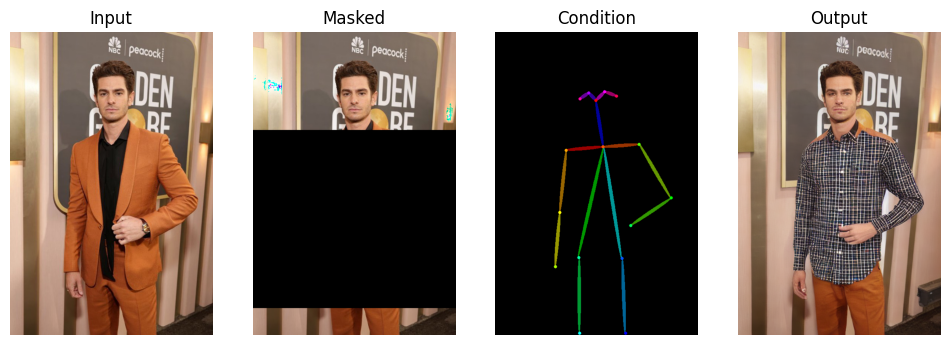

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(pose_real_image)
plt.axis('off')
plt.title('Input')
plt.subplot(1,4,2)
plt.imshow((255-np.array(pose_real_image))*(255-np.array(pose_mask)))
plt.axis('off')
plt.title('Masked')
plt.subplot(1,4,3)
plt.imshow(pose_image)
plt.axis('off')
plt.title('Condition')
plt.subplot(1,4,4)
plt.imshow(new_image)
plt.title('Output')
plt.axis('off')

In [ ]:
import gradio as gr

In [ ]:
from io import BytesIO

from torch import autocast
import requests
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline as StableDiffusionInpaintPipeline

In [ ]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

In [ ]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
# mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [ ]:
init_image = download_image(img_url).resize((512, 512))
pose_image = openpose(init_image)
pose_mask=np.zeros_like(np.array(init_image))
pose_mask[250:700,:,:]=255
pose_mask=Image.fromarray(pose_mask)
pose_mask.resize((512,512))
# mask_image = download_image(mask_url).resize((512, 512))

In [ ]:
device = "cuda"
pipe = pipe.to(device)

In [ ]:
def predict(dict, prompt):
  #init_img =  dict['image'].convert("RGB").resize((512, 512))
  # mask_img = dict['mask'].convert("RGB").resize((512, 512))

  pose_real_image = Image.open("input.jpeg")
  orig = pose_real_image.size
  openpose = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')

  pose_image = openpose(pose_real_image)
  pose_real_image=pose_real_image.resize(pose_image.size)

  pose_mask=np.zeros_like(np.array(pose_image))
  pose_mask[250:700,:,:]=255
  pose_mask=Image.fromarray(pose_mask)
  pipe.to('cuda')
  generator = torch.manual_seed(0)
  with autocast("cuda"):
    result = pipe(prompt=prompt, num_inference_steps=20,generator=generator,image=pose_real_image,control_image=pose_image,mask_image=pose_mask).images[0]

  result = result.resize(orig)
  return(result)

In [ ]:
gr.Interface(
    predict,
    title = 'Stable Diffusion In-Painting Tool on Colab with Gradio',
    inputs=[
        gr.Image(source = 'upload', type = 'pil'),
        gr.Textbox(label = 'prompt')
    ],
    outputs = [
        gr.Image()
        ]
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3ed600e7ebadd90bf9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
exit()